In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
data = pd.read_csv('/content/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data_new = data[['Geography','Gender','Exited']]
data_new.head()

,Geography,Gender,Exited
0,France,Female,1
1,Spain,Female,0
2,France,Female,1
3,France,Female,0
4,Spain,Female,0


In [7]:
data_new.Exited.value_counts()


,count
Exited,
0,7963
1,2037


In [8]:
data_new.Exited.value_counts()/len(data_new)*100

,count
Exited,
0,79.63
1,20.37


UNIVARIATE ANALYSIS


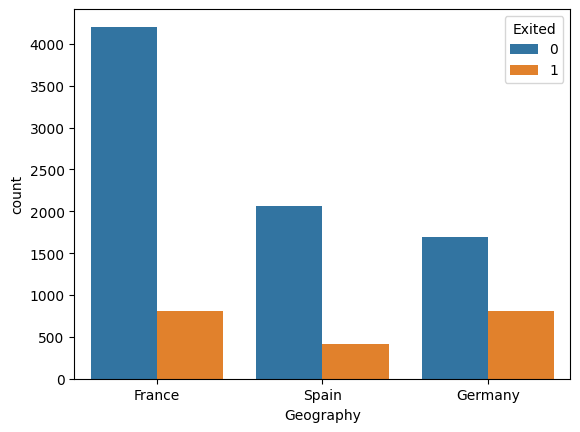

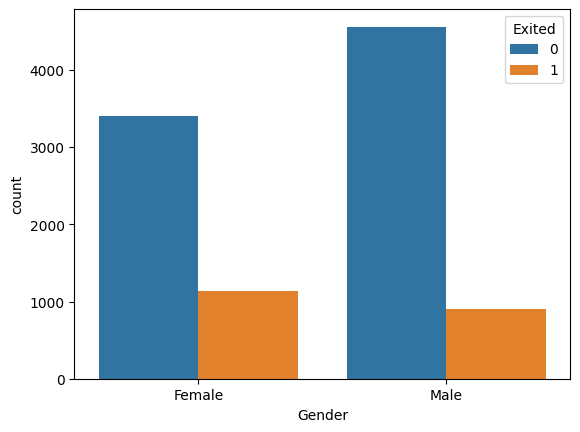

In [19]:
for predictor in data_new.drop(columns=['Exited']):
    plt.figure()
    sns.countplot(data=data_new, x=predictor , hue='Exited')

    # in this code it is classifies based on hue is exited if you remove hue then it would be the graph of geography vs total no of outputs consisting with that geography


BIVARIATE ANALYSIS


<Axes: xlabel='Gender', ylabel='Count'>

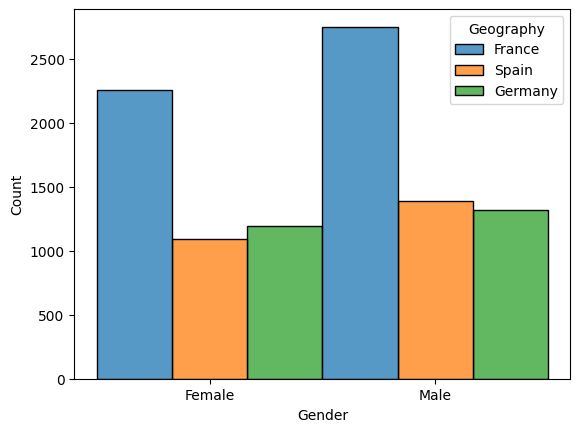

In [21]:
sns.histplot(x='Gender', hue='Geography', data=data_new,multiple='dodge')

In [26]:
data_new_target0 = data_new.loc[data_new["Exited"]==0]

<Axes: xlabel='Gender', ylabel='Count'>

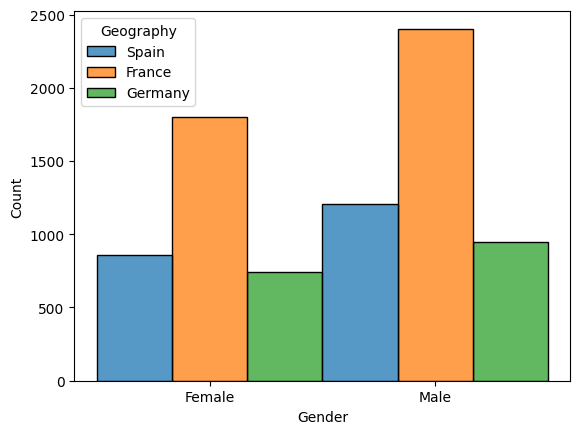

In [27]:
sns.histplot(x='Gender', hue='Geography', data=data_new_target0,multiple='dodge')

In [24]:
data_new_target1 = data_new.loc[data_new["Exited"]==1]

<Axes: xlabel='Gender', ylabel='Count'>

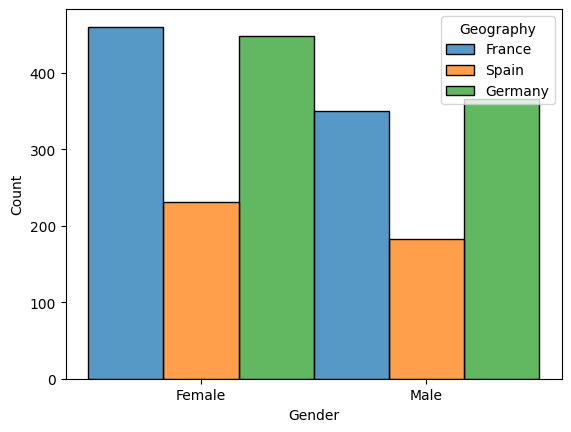

In [25]:
sns.histplot(x='Gender', hue='Geography', data=data_new_target1,multiple='dodge')

NUMERICAL ANALYSIS

In [31]:
data.select_dtypes(include='number').corr()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

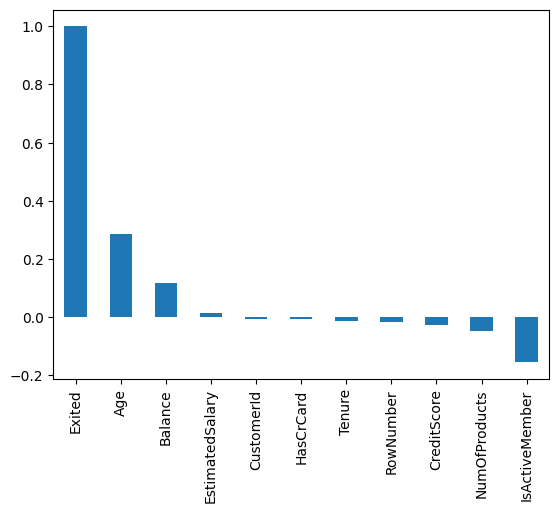

In [33]:
data.select_dtypes(include='number').corr()['Exited'].sort_values(ascending=False).plot(kind='bar')

# it gives the correlations plot between output values(Exited) and other values

<Axes: >

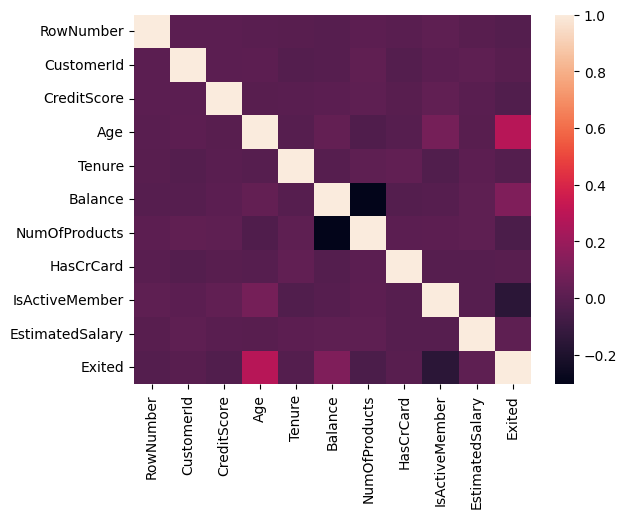

In [36]:
sns.heatmap(data.select_dtypes(include='number').corr())


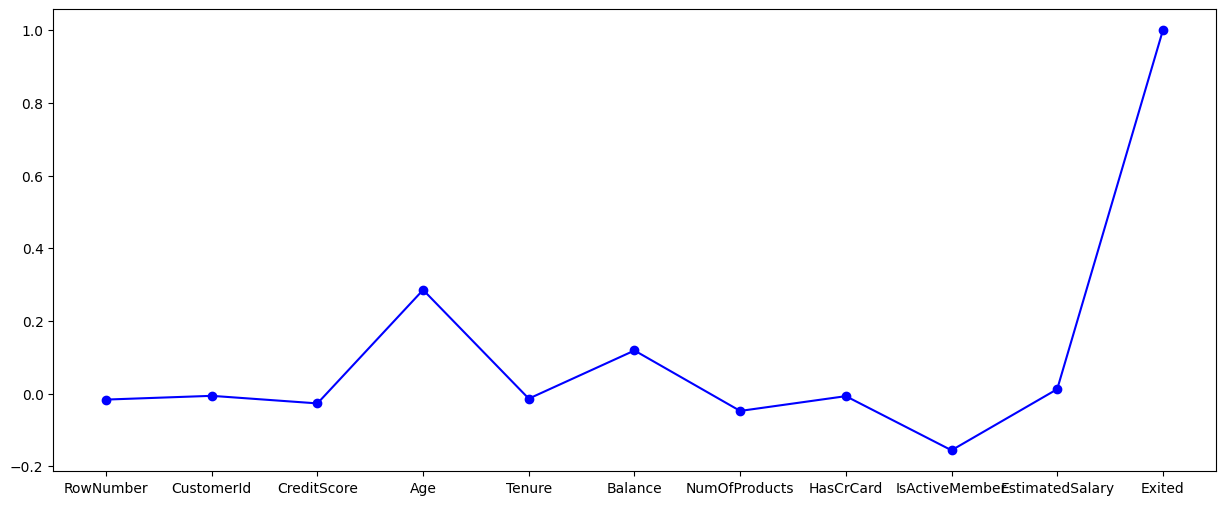

In [51]:
plt.figure(figsize=(15, 6))
x= data.select_dtypes(include='number').columns.tolist()
y=data.select_dtypes(include='number').corr()['Exited'].tolist()
plt.plot(x,y,marker='o', linestyle='-', color='b')

<Axes: xlabel='Age'>

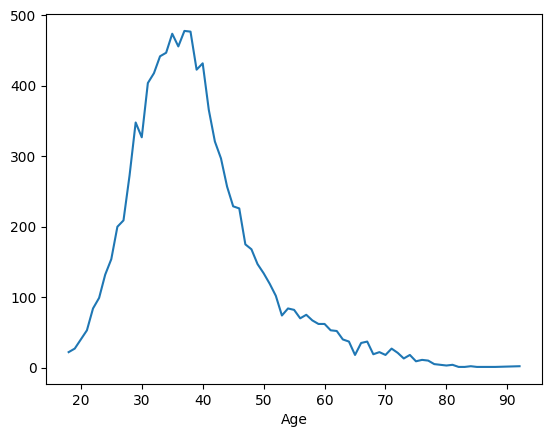

In [54]:
data['Age'].value_counts().sort_index().plot()

<Axes: xlabel='Age'>

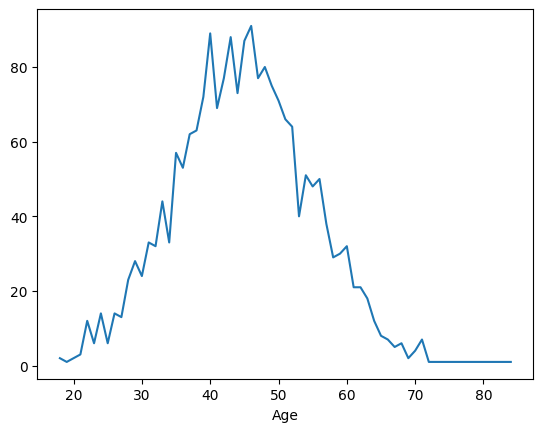

In [55]:
data['Age'].loc[data['Exited'] == 1].value_counts().sort_index().plot()

<ipython-input-59-0dd8d27302e1>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  graph = sns.kdeplot(data.Age[(data['Exited']==1)] , color='Red' , shade = True)
<ipython-input-59-0dd8d27302e1>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  graph = sns.kdeplot(data.Age[(data['Exited']==0)] , color='Blue' , shade = True)


Text(0.5, 1.0, 'Age by churn')

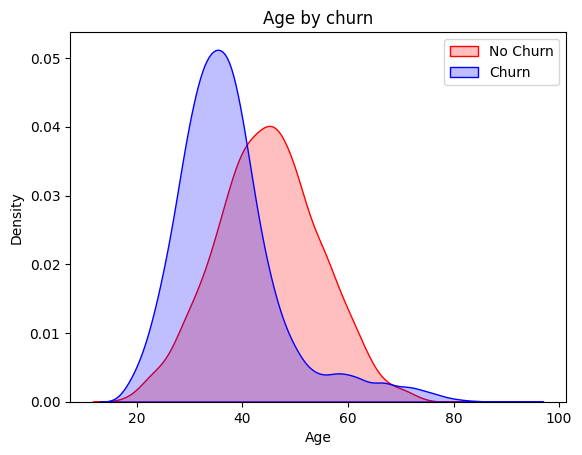

In [59]:
graph = sns.kdeplot(data.Age[(data['Exited']==1)] , color='Red' , shade = True)
graph = sns.kdeplot(data.Age[(data['Exited']==0)] , color='Blue' , shade = True)
graph.legend(["No Churn", "Churn"], loc='upper right')
graph.set_ylabel('Density')
graph.set_xlabel('Age')
graph.set_title('Age by churn')

<ipython-input-61-f37031b4b9e1>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  graph = sns.kdeplot(data.Balance[(data['Exited']==1)] , color='Red' , shade = True)
<ipython-input-61-f37031b4b9e1>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  graph = sns.kdeplot(data.Balance[(data['Exited']==0)] , color='Blue' , shade = True)


Text(0.5, 1.0, 'Balance by churn')

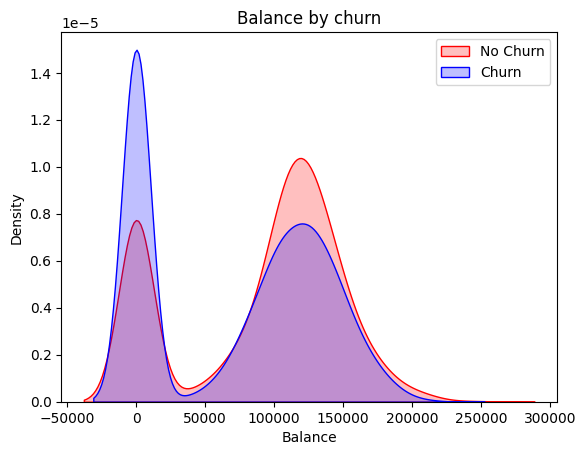

In [61]:
graph = sns.kdeplot(data.Balance[(data['Exited']==1)] , color='Red' , shade = True)
graph = sns.kdeplot(data.Balance[(data['Exited']==0)] , color='Blue' , shade = True)
graph.legend(["No Churn", "Churn"], loc='upper right')
graph.set_ylabel('Density')
graph.set_xlabel('Balance')
graph.set_title('Balance by churn')